# Implement Logistic Regression for Book Classification

This notebook does the following:

* Loads a data set for predicting whether a book is hardcover or paperback from two input features: the thickness of the book and the weight of the book
* Normalizes the features
* Has a placeholder for your implementation of logistic regression
* Plots the data and the decision boundary of the learned model

Read below and follow instructions to complete the implementation.

## Setup
Run the code below to import modules, etc.

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from util import normalize_features
from logistic_regression import logistic, cost_function, gradient_descent

## Load and Prep Data
*Read the code* in the cell below and run it. This loads the book data from file and selects two features to set up the training data ``X`` (data matrix) and ``y`` (label vector). It then normalizes the training data.

In [2]:
data = pd.read_csv('book-data.csv', sep=',',header=None).values

# % Data columns
# %
# % 0 - width
# % 1 - thickness
# % 2 - height
# % 3 - pages
# % 4 - hardcover
# % 5 - weight

y = data[:,4]

# % Extract the normalized features into named column vectors
width     = data[:,0]
thickness = data[:,1]
height    = data[:,2]
pages     = data[:,3]
weight    = data[:,5]

m = data.shape[0]
X = np.stack([np.ones(m), thickness, height], axis=1)
n = X.shape[1]

X, mu, sigma = normalize_features(X)

# (1 point) Implement the ``logistic`` function
Open the file ``logistic_regression.py`` and complete the code for the function ``logistic``. Then run the cell below to plot the logistic function for $-10 \leq z \leq 10$ to test your implementation --- it should look like the logistic function!

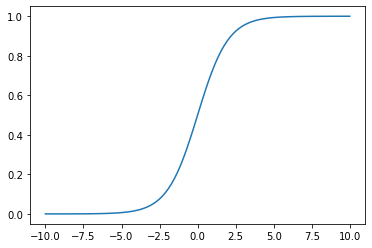

In [3]:
z = np.linspace(-10, 10, 100)
plt.plot(z, logistic(z))
plt.show()

# (2 points) Implement ``cost_function``
Complete the code for ``cost_function`` in the file ``logistic_regression.py`` to implement the logistic regression cost function. Then test it with the code in the cell below.

In [4]:
theta = np.zeros(n)
print(cost_function(X, y, theta)) # prints 38.81624....

38.816242111356935


# Setup for plotting a learned model
Run this cell and optionally read the code. It defines a function to help plot the data together with the decision boundary for the model we are about to learn.

In [5]:
def plot_model(X, y, theta):
    pos = y==1
    neg = y==0

    plt.scatter(X[pos,1], X[pos,2], marker='+', color='blue', label='Hardcover')
    plt.scatter(X[neg,1], X[neg,2], marker='o', color='red', facecolors='none', label='Paperback')

    # plot the decision boundary
    x1_min = np.min(X[:,1]) - 0.5
    x1_max = np.max(X[:,1]) + 0.5

    x1 = np.array([x1_min, x1_max])
    x2 = (theta[0] + theta[1]*x1)/(-theta[2])
    plt.plot(x1, x2, label='Decision boundary')

    plt.xlabel('thickness (normalized)')
    plt.ylabel('height (normalized)')
    plt.legend(loc='lower right')
    plt.show()

# (7 points) Implement gradient descent for logistic regression
Now complete the code for ``gradient_descent`` in the file ``logistic_regression.py``, which runs gradient descent to find the best parameters ``theta``, and write code in the cell below to:

1. Call ``gradient_descent`` to learn ``theta``
1. Print the final value of the cost function
1. Plot J_history to assess convergence
1. Tune the step size and number of iterations if needed until the algorithm converges and the decision boundary (see next cell) looks reasonable
1. Print the accuracy---the percentage of correctly classified examples in the training set

26.269782272355343


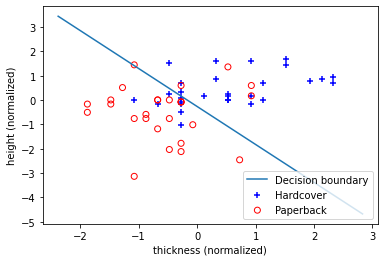

In [9]:
theta = np.zeros(n)

alpha = 0.1
iters = 10000
theta, J_history = gradient_descent(X, y, theta, alpha, iters)
print(J_history[len(J_history) - 1])

# Plots data and decision boundary. If you have learned a good theta
# you will see a decision boundary that separates the data in a 
# reasonable way.
plot_model(X, y, theta) 

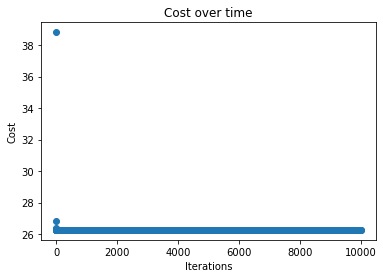

In [10]:
plt.scatter(range(iters), J_history)
plt.title('Cost over time')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [11]:
h_theta = lambda X_i: logistic(np.dot(theta.T, X_i))
predictions = np.round(np.apply_along_axis(h_theta, 1, X))
correct_classifications = predictions[predictions == y]

print("Accuracy: %.2f" % ((correct_classifications.shape[0] / predictions.shape[0]) * 100) + "%")

Accuracy: 76.79%
